# Estimators e Transformers



---


[documentação](https://scikit-learn.org/stable/index.html) <br>


---

>[Estimators e Transformers](#scrollTo=QoBv84MIUa-h)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos aplicar um processamento genérico](#scrollTo=BKzodGb8R7t9)

>>>[3.1.  Removemos as colunas com pouca informação](#scrollTo=rEuiN5R7Przw)

>>>[3.2.  Removemos as linhas de embarked sem valor](#scrollTo=c4ZBqVliAQ0V)

>>[4. Vamos fazer o train test split](#scrollTo=vevBCPmAm2K9)

>>[5. Vamos definir os nossos transformers](#scrollTo=KV4twHrUn9wT)

>>>[5.1.  Imputamos valores](#scrollTo=PEYghDvyQAdi)

>>>[5.2. Tratamos as variáveis categóricas](#scrollTo=Zr_lOzPEVUOS)

>>>[5.3. Escalamos as variáveis](#scrollTo=7sdPNoqx9UYX)

>>[6. Aplicamos o modelo de classificação e prevemos a target](#scrollTo=8n3xkNPVquVi)

>>>[6.1. Fazemos fit do modelo de classificação](#scrollTo=STxg2PYWredC)

>>>[6.2. Fazemos predict](#scrollTo=81g96ET0rng6)

>>>[6.3. Vamos avaliar os resultados](#scrollTo=gtR2Knc4s2bL)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [1]:
# packages gerais
import pandas as pd
import numpy as np

# vamos importar o dataset do titanic
df = pd.read_csv("titanic.csv")

## 2.&nbsp;Vamos explorar o dataset

In [2]:
# vamos avaliar os dados em falta
df.isna().sum()
# df[df.isna().sum(axis = 1) > 1]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# exploração inicial
# df.head()
# df.info()
# df.shape
# df.describe()

## 3.&nbsp;Vamos aplicar um processamento genérico

### 3.1.&nbsp; Removemos as colunas com pouca informação

In [4]:
# fazemos um simples drop
df.drop('Cabin', axis=1, inplace=True)

### 3.2.&nbsp; Removemos as linhas de embarked sem valor

In [5]:
# vamos fazer dropna para remover os 2 casos que faltam
df.dropna(subset=['Embarked'], inplace=True)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 4.&nbsp;Vamos fazer o train test split

In [7]:
# definimos a variável alvo
target_variable = "Survived"

# train_test split usando a função train_test_split
X = df.drop(["PassengerId", "Name", "Ticket", target_variable], axis = 1)
y = df[target_variable]
y.sum()/len(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12,
                                                    stratify = y)

## 5.&nbsp;Vamos definir os nossos transformers

### 5.1.&nbsp; Imputamos valores

<Axes: >

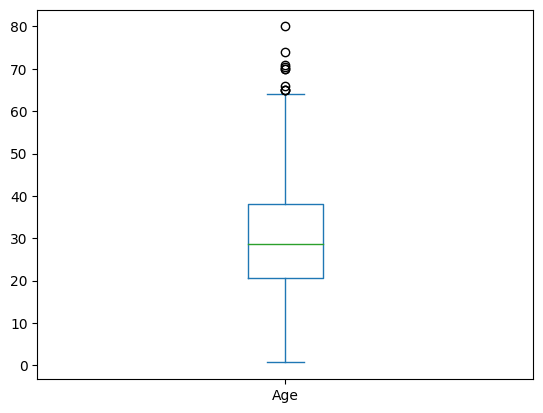

In [8]:
X_train.Age.plot(kind='box')

In [9]:
# vamos importar o modelo de impute
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'median')
X_train['Age'] = si.fit_transform(X_train[['Age']])

### 5.2.&nbsp;Tratamos as variáveis categóricas
  * Pclass
  * Sex
  * SibSp
  * Parch
  * Embarked

In [10]:
# vamos importar o package
from sklearn.preprocessing import OneHotEncoder

# vamos criar a lista de colunas a passar ao modelo
ohe_list = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe_data = ohe.fit_transform(X_train[ohe_list]) # entrega em array
ohe_column_names = ohe.get_feature_names_out()

# vamos criar um df
df_ohe = pd.DataFrame(
    data=ohe_data,
    columns=ohe_column_names
)

# vamos juntar tudo
X_train = pd.concat([X_train.reset_index(drop = True), df_ohe.reset_index(drop = True)], axis = 1)
X_train.drop(ohe_list, inplace=True, axis=1)

### 5.3.&nbsp;Escalamos as variáveis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

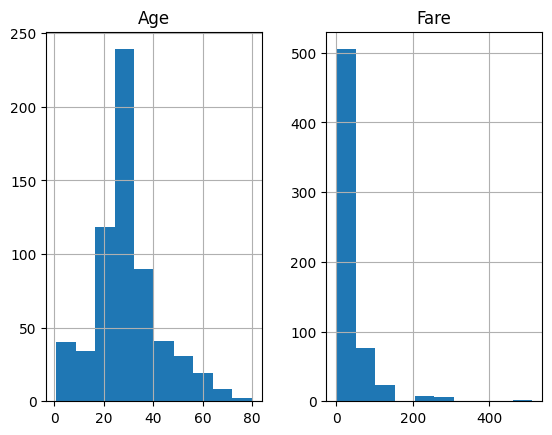

In [11]:
X_train[['Age', 'Fare']].hist()

In [12]:
# vamos importar o package
from sklearn.preprocessing import StandardScaler, PowerTransformer

# vamos utilizar o StandardScaler na idade
std_scaler = StandardScaler()
X_train['Age'] = std_scaler.fit_transform(X_train[['Age']]) # entrega em array

# vamos usar a transformação de yeo-johnson na tarifa
pow_scaler = PowerTransformer()
X_train['Fare'] = pow_scaler.fit_transform(X_train[['Fare']]) # entrega em array

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

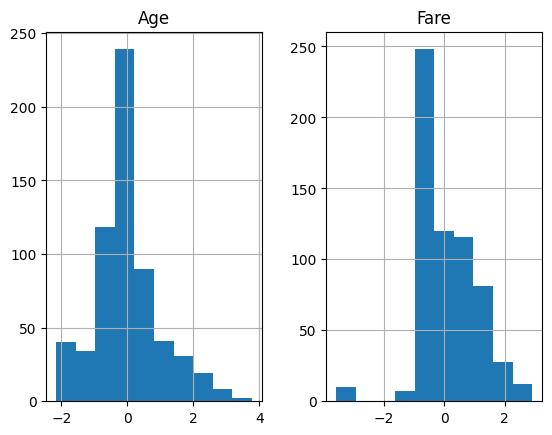

In [13]:
X_train[['Age', 'Fare']].hist()

## 6.&nbsp;Aplicamos o modelo de classificação e prevemos a target

### 6.1.&nbsp;Fazemos fit do modelo de classificação

In [14]:
# importamos o modelo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( max_iter = 250)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=250)

### 6.2.&nbsp;Fazemos predict

In [15]:
# Temos de aplicar aos dados de teste todos os transformers
X_test['Age'] = si.transform(X_test[['Age']])

ohe_data = ohe.transform(X_test[ohe_list]) # entrega em array
df_ohe = pd.DataFrame(
    data=ohe_data,
    columns=ohe_column_names
)
X_test = pd.concat([X_test.reset_index(drop = True), df_ohe.reset_index(drop = True)], axis = 1)
X_test.drop(ohe_list, inplace=True, axis=1)

X_test['Age'] = std_scaler.transform(X_test[['Age']]) # entrega em array
X_test['Fare'] = pow_scaler.transform(X_test[['Fare']]) # entrega em array

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [16]:
y_pred_log_reg = log_reg.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
log_reg.score(X_test, y_test)

0.7827715355805244

### 6.3.&nbsp;Vamos avaliar os resultados

In [17]:
# importamos os módulos que precisamos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rótulos = ['morreu', 'sobrevivieu']

# vamos ver as métricas para a regressão logística
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg, target_names = rótulos))

[[137  28]
 [ 30  72]]
              precision    recall  f1-score   support

      morreu       0.82      0.83      0.83       165
 sobrevivieu       0.72      0.71      0.71       102

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



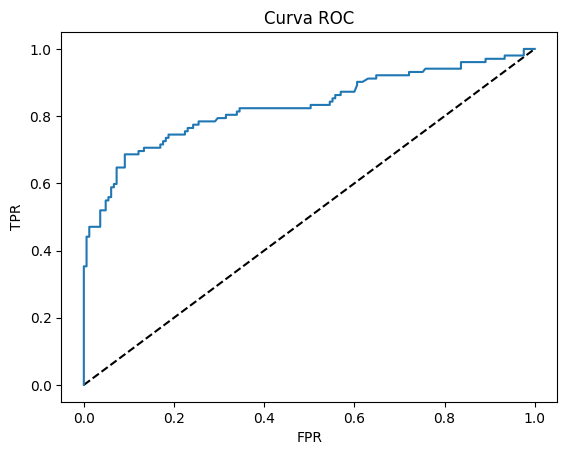

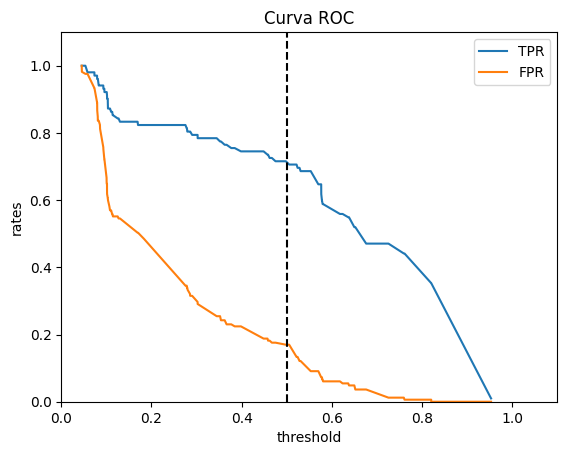

In [18]:
# importamos a curva roc
from sklearn.metrics import roc_curve

# Calculamos as probabilidades previstas (.predict_proba)
log_reg.predict_proba(X_test)
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:,1] # escolhemos a segunda coluna

# Vamos gerar a curva ROC
FPR, TPR, thresholds = roc_curve(y_test, y_pred_log_reg_prob)

# Vamos visualizar a curva
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

# vamos visualisar a influência do threshold
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.plot(thresholds[1:], TPR[1:])
plt.plot(thresholds[1:], FPR[1:])
plt.plot([0.5, 0.5], [0, 1.1], 'k--')
plt.xlabel('threshold')
plt.ylabel('rates')
plt.legend(['TPR', 'FPR'])
plt.title('Curva ROC')
plt.show()

In [19]:
# vamos calcular a AUC
from sklearn.metrics import roc_auc_score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_log_reg_prob)))

AUC: 0.8294117647058824
